# Pásovec devítipásý - *Dasypus novemcinctus*
## Brenda Tomčalová

<img src="http://img.abicko.cz/img/5/full/991833_pasovec.jpg" width=50% alt="Pásovec • shutterstock.com" >

### Krátce o pásovci ###

Citováno z: http://www.biolib.cz/cz/taxon/id31923/, Založeno: 20.09.2004 22:10:25 - Uživatel Ondřej Zicha

**říše** Animalia - živočichové »  **kmen** Chordata - strunatci »  **třída** Mammalia - savci »  **řád** Xenarthra - chudozubí »  **čeleď** Dasypodidae - pásovcovití »  **rod** Dasypus - pásovec

**Velikost**: Délka těla je od 40 do 55 cm, ocas 30 až 45 cm. Hmotnost okolo 5 kilogramů.

**Ekologie:** Žije na různých lokalitách od nížin až po vysoké hory. Nejčastěji se vyskytuje na savanách a polopouštích. Pronikl na severu až do jižních států USA a šíří se dále. Krunýř je na hřbetě rozdělený nejčastěji do devíti pásů. Přes den se ukrývá v norách. V noci za pomoci čichu vyhledává hmyz a jeho larvy, červy, ptačí vejce, drobné obratlovce i plody a jiné části rostlin. Také u tohoto druhu se vyskytuje polyembryonie. Páří se v létě, zárodek pak zastavuje svůj vývoj (utajená březost) až do listopadu. Na jaře pak rodí 4 až 12 identických mláďat stejného pohlaví.

**Rozšíření:** Od jihu USA až po severní Argentinu a na Trinidadu, Grenadě a Tobagu (podrobněji na: http://www.iucnredlist.org/details/6290/0)

### Zajímavosti: ###

Čerpáno z: http://www.nwf.org/wildlife/wildlife-library/mammals/nine-banded-armadillo.aspx, 1996-2016 National Wildlife Federation

Existuje zhruba 20 druhů pásovců, přičemž pouze dva druhy se dokáží stočit do obranného klubíčka podobného Hvězdě smrti ze Star Wars (viz obrázek, kde je pásovec kulovitý). Pásovec devítipásý se bohužel stočit neumí.

Obrázek pásovce kulovitého:
<img src="http://www.nature-photogallery.eu/cz/__userdata/photos/2334.jpg" width=30% alt="http://www.nature-photogallery.eu/cz/foto/2334-pasovec-kulovity/?puvod=27" >

Pásovec devítipásý má ale parádní obrnění, které jim pomáhá přežít útok predátorů jako jsou pumy, baribalů a aligátorů. Dožívá se v přírodě 7 - 20 let a byl dokonce zaznamenán případ, že se dožil 23. 

Když je pásovec vyděšený, skočí vysoko do vzduchu (až 1 m). 

Pásovec byl dříve jezen chudými lidmi, ale dnes je často chován jako domácí mazlíček a používá se také jako laboratorní zvíře při výzkumu lepry (více v review: Indian J Lepr. 1991 Jul-Dec;63(3-4):356-61.) 
Další zajímavostí je údajná odražená kulka od krunýře pásovce http://zpravy.idnes.cz/pasovec-texas-strelba-odrazena-kulka-dsv-/zahranicni.aspx?c=A150801_173040_zahranicni_aba, ale to nevím, jestli není hoax.

Načtení potřebných modulů a knihoven a úprava vstupních dat podle Filipa Sedláka.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
import pylab as pl
import re

In [2]:
genes=pd.read_table('/home/brenda/skola/du/pasovec_gene.gtf', header=None, dtype={0:np.object})
genes.columns = ["seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]

In [3]:
transcripts=pd.read_table('/home/brenda/skola/du/pasovec_transcript.gtf', header=None, dtype={0:np.object})
transcripts.columns = ["seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]

In [4]:
def parse_attributes(attributes_str):
    """Načte obsah sloupce attribute jako `dict`.
    
    - Pozor, neporadí si se středníky v hodnotách a očekává uvozovky
      kolem každé hodnoty.
      
      
    Parametry:
    
    `attributes_str` - hodnota GTF sloupce attribute jako string
    """
    ONLY_ATTRIBUTES = set(["gene_id", 
                          "transcript_id",
                          "gene_name",
                          "gene_biotype",
                          "transcript_name",
                          "transcript_biotype"])
    
    out = {}
    
    for pair in attributes_str.split(";"):
        if pair.strip() == "":
            continue
        m = re.match(r"^\s*(.+) \"(.+)\"$", pair)
        
        if m.group(1) in ONLY_ATTRIBUTES:
            out[m.group(1)] = m.group(2)

    return out

In [5]:
def split_attribute_column(df):
    """Rozdělí sloupec `attribute` data frame GTF souboru do vlastních
    sloupců.
    """
    attributes_columns = df.attribute.apply(parse_attributes).apply(pd.Series)
    return pd.concat([df.drop(["attribute"], axis=1),
                      attributes_columns],
                     axis=1)

genes = split_attribute_column(genes)
transcripts = split_attribute_column(transcripts)

**Jsou data z jednoho zdroje?**

In [7]:
genes["source"].unique()

array(['ensembl'], dtype=object)

In [8]:
transcripts["source"].unique()

array(['ensembl'], dtype=object)

Data jsou z jednoho zdroje - databáze Ensembl. Po zadání "ensembl dasypus novemcinctus" do vyhledávače nalezena stránka http://www.ensembl.org/Dasypus_novemcinctus/Info/Annotation - možnost kontroly výsledků příkazů 

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS7Pdlyjth8o0PV6bRgjBEv5CERiWpea-OqnRPlYSU-Uu9riJY9aA" alt="http://zoom.iprima.cz/clanky/video-nejroztomilejsi-pasovec-sveta" >

### Analýza dat ###

**Obsah:**
1. Kolik má pásovec identifikovaných sekvencí?
2. Kolik má všech genů (včetně pseudogenů a RNA kódujících genů)?
3. Jaké má typy genů a s jakou četností?
    3. Graf četností genových typů
4. Jaké jsou rozdíly v délkách pro jednotlivé typy genů? - základní statistika
    4. Boxplot snRNA a miRNA
5. Jaká je četnost genů kódujících jeden a více transkriptů?
6. Kolik genů se nachází na řetězci +/-?
7. Kolik genů nemá název?
    7. Příklad nepojmenovaných genů
8. Kolik genů má název?
    8. Zkouška
9. Kolik genů má unikátní název? (v datasetu se objevuje více stejně pojmenovaných genů)
    7. Zkouška, jestli metoda nunique splňuje zadání
10. Kolik má pásovec transkriptů?
11. Jaké má typy transkriptů a s jakou četností?
12. Jaké jsou rozdíly v délkách pro jednotlivé typy transkriptů? - základní statistika
13. Kolik transkriptů se nachází na řetězci +/-?
14. Kolik transkriptů nemá název?
    14. Příklad nepojmenovaných transkriptů
15. Kolik transkriptů má název?
    15. Zkouška
16. Kolik transkriptů má unikátní název?

** 1. Kolik má pásovec identifikovaných sekvencí? **

In [9]:
len(genes["seqname"].unique())

4823

** 2. Kolik má všech genů (včetně pseudogenů a RNA kódujících genů)? **

In [10]:
len(genes)

33374

** 3. Jaké má typy genů a s jakou četností? **

In [11]:
type_genes = genes["gene_biotype"].value_counts()
type_genes

protein_coding          22711
lincRNA                  3179
snRNA                    2851
snoRNA                   1625
pseudogene               1364
miRNA                     841
misc_RNA                  474
rRNA                      169
processed_pseudogene      136
Mt_tRNA                    22
Mt_rRNA                     2
Name: gene_biotype, dtype: int64

Výstup ukazuje v levém sloupci kategorie - typy genů (protein-kódujících, kódujících lincRNA,...). V pravém sloupci kolik genů se přiřazuje zmíněné kategorii.

** A. Graf četností genových typů **

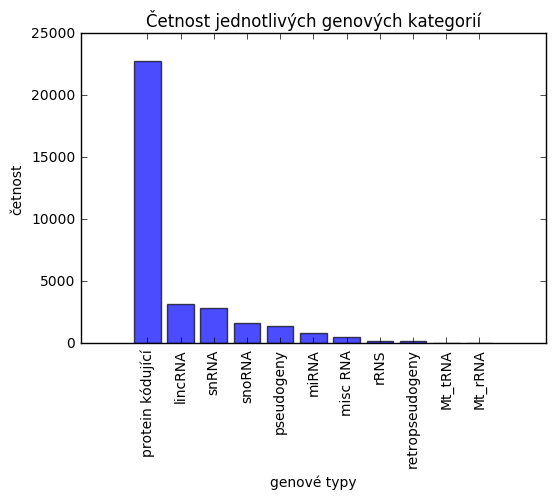

In [12]:
y_pos = np.arange(11)
plt.bar(y_pos, type_genes,align='center', alpha=0.7) 
plt.xticks(y_pos, ["protein kódující","lincRNA","snRNA","snoRNA","pseudogeny","miRNA","misc RNA","rRNS", "retropseudogeny","Mt_tRNA","Mt_rRNA"])
plt.ylabel('četnost')
plt.xlabel("genové typy")
plt.title('Četnost jednotlivých genových kategorií')
for ax in plt.gcf().axes:
    plt.sca(ax)
    plt.xticks(ax.get_xticks(), rotation=90)
plt.show()

** 4. Jaké jsou rozdíly v délkách pro jednotlivé typy genů? - základní statistika**

In [13]:
genes["length"]=genes["end"]-genes["start"]
print(genes.groupby(["gene_biotype"])["length"].describe().to_string())

gene_biotype               
Mt_rRNA               count    2.000000e+00
                      mean     1.271000e+03
                      std      4.327494e+02
                      min      9.650000e+02
                      25%      1.118000e+03
                      50%      1.271000e+03
                      75%      1.424000e+03
                      max      1.577000e+03
Mt_tRNA               count    2.200000e+01
                      mean     6.786364e+01
                      std      3.342304e+00
                      min      5.900000e+01
                      25%      6.725000e+01
                      50%      6.800000e+01
                      75%      6.900000e+01
                      max      7.400000e+01
lincRNA               count    3.179000e+03
                      mean     1.744020e+04
                      std      3.245018e+04
                      min      2.480000e+02
                      25%      1.876500e+03
                      50%      4.595000e+03
    

count = počet

mean = průměr

std = směrodatná odchylka

min = minimum

25% - 50% - 75% = jednotlivé kvartily

max = maximum

** A. Boxplot snRNA a miRNA **

In [14]:
len_snRNA=genes[genes["gene_biotype"]=="snRNA"].length
len_miRNA=genes[genes["gene_biotype"]=="miRNA"].length
x1=len_snRNA.tolist()
x2=len_miRNA.tolist()
x=[x1,x2]

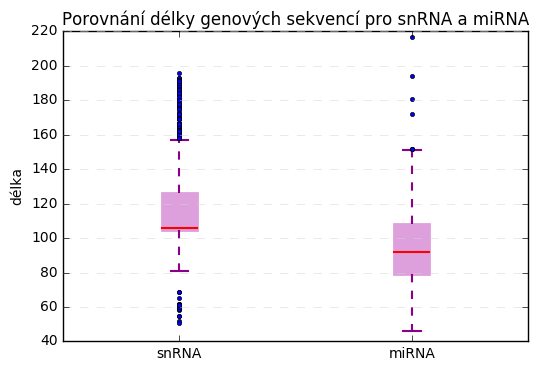

In [15]:
plot1=plt.boxplot(x, vert=True, patch_artist=True)
plt.setp(plot1['boxes'],color='Plum',linewidth=2,facecolor='SkyBlue')
plt.setp(plot1['whiskers'], color='DarkMagenta', linewidth=1.5) 
plt.setp(plot1['caps'], color='DarkMagenta', linewidth=1.5)  
plt.setp(plot1['fliers'], marker='o', markersize=3)
plt.setp(plot1['medians'], linewidth=1.5) 
plt.grid(axis='y', linestyle='--', which='major', color='lightgrey', alpha=0.7)
plt.xticks([1, 2], ["snRNA", "miRNA"])
plt.ylabel('délka') 
plt.title('Porovnání délky genových sekvencí pro snRNA a miRNA')
plt.show()

** 5. Jaká je četnost genů kódujících jeden a více transkriptů? **

In [16]:
hist_genes = transcripts["gene_id"].value_counts().value_counts()
hist_genes

1     30094
2      2475
3       628
4       123
5        35
6        12
7         4
10        2
8         1
Name: gene_id, dtype: int64

Výstup ukazuje v levém sloupci počet transkriptů na gen, v pravém sloupci četnost genů. Př.: jeden gen kóduje osm transkriptů (viz poslední řádek výstupu).

** 6. Kolik genů se nachází na řetězci +/-? **

In [17]:
strand_genes = genes["strand"].value_counts()
strand_genes

+    16805
-    16569
Name: strand, dtype: int64

** 7. Kolik genů nemá název? **

In [18]:
unnamed_genes = genes["gene_name"].isnull().values.sum()
unnamed_genes

19552

** A. Příklad nepojmenovaných genů **

In [11]:
genes[1:2]

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name
1,JH573670.1,ensembl,gene,163668,163774,.,-,.,snRNA,ENSDNOG00000043683,NaN


In [12]:
genes[4:5]

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name
4,JH573670.1,ensembl,gene,1038320,1038457,.,-,.,snRNA,ENSDNOG00000027861,NaN


** 8. Kolik genů má název? **

In [19]:
named_genes = genes["gene_name"].notnull().values.sum()
named_genes

13822

** A. Zkouška **

In [20]:
unnamed_genes+named_genes==len(genes)

True

** 9. Kolik genů má unikátní název? (v datasetu se objevuje více stejně pojmenovaných genů) **

In [21]:
named_genes_unique = genes["gene_name"].nunique()
named_genes_unique

13663

Ukázka dvou náhodně vybraných genů se stejným gene_name a jinými gene_id a pozicí.

In [9]:
genes[33185:33186:]

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name
33185,AAGV03068567.1,ensembl,gene,425,543,.,+,.,rRNA,ENSDNOG00000042249,5S_rRNA


In [10]:
genes[33238:33239:]

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name
33238,AAGV03298070.1,ensembl,gene,1044,1162,.,+,.,rRNA,ENSDNOG00000035611,5S_rRNA


** A. Zkouška, jestli metoda nunique splňuje zadání **

In [24]:
named_genes_check=len(genes["gene_name"][genes["gene_name"].notnull()].unique())
named_genes_check

13663

<img src="http://www.tierbildergalerie.com/data/media/35/gurtel_tier.jpg" width=30% alt="http://www.tierbildergalerie.com/bild-gurtel-tier-3490.htm" >

** 10. Kolik má pásovec transkriptů? **

In [25]:
len(transcripts)

37723

** 11. Jaké má typy transcriptů a s jakou četností?**

In [26]:
type_transcripts = transcripts["transcript_biotype"].value_counts()
type_transcripts

protein_coding          26551
lincRNA                  3688
snRNA                    2851
snoRNA                   1625
pseudogene               1364
miRNA                     841
misc_RNA                  474
rRNA                      169
processed_pseudogene      136
Mt_tRNA                    22
Mt_rRNA                     2
Name: transcript_biotype, dtype: int64

Výstup ukazuje v levém sloupci kategorie - typy genů kódující transkript. V pravém sloupci kolik transkriptů se přiřazuje zmíněné kategorii.

** 12. Jaké jsou rozdíly v délkách pro jednotlivé typy transkriptů? - základní statistika**

In [27]:
transcripts["length"]=transcripts["end"]-transcripts["start"]
print(transcripts.groupby(["transcript_biotype"])["length"].describe().to_string())

transcript_biotype         
Mt_rRNA               count    2.000000e+00
                      mean     1.271000e+03
                      std      4.327494e+02
                      min      9.650000e+02
                      25%      1.118000e+03
                      50%      1.271000e+03
                      75%      1.424000e+03
                      max      1.577000e+03
Mt_tRNA               count    2.200000e+01
                      mean     6.786364e+01
                      std      3.342304e+00
                      min      5.900000e+01
                      25%      6.725000e+01
                      50%      6.800000e+01
                      75%      6.900000e+01
                      max      7.400000e+01
lincRNA               count    3.688000e+03
                      mean     1.726177e+04
                      std      3.092504e+04
                      min      2.480000e+02
                      25%      1.938250e+03
                      50%      4.876500e+03
    

count = počet

mean = průměr

std = směrodatná odchylka

min = minimum

25% - 50% - 75% = jednotlivé kvartily

max = maximum

** 13. Kolik transkriptů se nachází na řetězci +/-? **

In [13]:
strand_transcripts = transcripts["strand"].value_counts()
strand_transcripts

+    19067
-    18656
Name: strand, dtype: int64

** 14. Kolik transkriptů nemá název? **

In [14]:
unnamed_transcripts = transcripts["transcript_name"].isnull().values.sum()
unnamed_transcripts

21193

** A. Příklad nepojmenovaných transkriptů **

In [15]:
transcripts[1:2]

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,transcript_biotype,transcript_id,transcript_name
1,JH573670.1,ensembl,transcript,163668,163774,.,-,.,snRNA,ENSDNOG00000043683,NaN,snRNA,ENSDNOT00000034869,NaN


In [16]:
transcripts[4:5]

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,transcript_biotype,transcript_id,transcript_name
4,JH573670.1,ensembl,transcript,1038320,1038457,.,-,.,snRNA,ENSDNOG00000027861,NaN,snRNA,ENSDNOT00000026322,NaN


** 15. Kolik transkriptů má název? **

In [30]:
named_transcripts = transcripts["transcript_name"].notnull().values.sum()
named_transcripts

16530

** A. Zkouška **

In [31]:
unnamed_transcripts+named_transcripts==len(transcripts)

True

** 16. Kolik transkriptů má unikátní název? **

In [32]:
named_transcripts = transcripts["transcript_name"].nunique()
named_transcripts

16371

##  Děkuji za pozornost! ## 

<img src="https://cdn.i0.cz/public-data/07/55/f147d3773100b32f54a92b2d6546_w900_h691_gi:photo:492937.jpg?hash=7326dbef6608f8a95e454146d7dd2caa" width=50% alt="https://www.zena.cz/rodina/pohadka-na-vikend-jak-jel-pasovec-k-babicce/r~i:article:708775/?redirected=1482874922" >